# Coinmarketcap API Project

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import seaborn as sns
from matplotlib import pyplot as plt

## Extract Data

In [2]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 <---- to get the jupyter to work

In [3]:
my_api_key = 'd46ce64b-a724-4e6e-a7f7-4d4a704093ac'
test_api_key = '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': test_api_key,
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [5]:
data.keys()

dict_keys(['status', 'data'])

In [6]:
data['data'][:1]

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 9660,
  'date_added': '2013-04-28T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_supply': 21000000,
  'circulating_supply': 19114287,
  '

In [7]:
# json normalize pandas
df = pd.json_normalize(data['data']).head()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9660,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.911429e+07,1.911429e+07,...,4.432018e+11,40.3562,4.869257e+11,NaN,2022-08-06T21:45:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5922,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.218576e+08,1.218576e+08,...,2.089779e+11,19.0287,2.089779e+11,NaN,2022-08-06T21:45:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,37474,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.647653e+10,6.915898e+10,...,6.648400e+10,6.0538,6.916676e+10,NaN,2022-08-06T21:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,5175,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.428995e+10,5.428995e+10,...,5.429216e+10,4.9436,5.429216e+10,NaN,2022-08-06T21:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1052,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,...,5.143413e+10,4.6834,6.375977e+10,NaN,2022-08-06T21:45:00.000Z,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5 non-null      int64  
 1   name                                5 non-null      object 
 2   symbol                              5 non-null      object 
 3   slug                                5 non-null      object 
 4   num_market_pairs                    5 non-null      int64  
 5   date_added                          5 non-null      object 
 6   tags                                5 non-null      object 
 7   max_supply                          2 non-null      float64
 8   circulating_supply                  5 non-null      float64
 9   total_supply                        5 non-null      float64
 10  platform                            0 non-null      float64
 11  cmc_rank                            5 non-null   

In [9]:
df.isnull().sum()

id                                    0
name                                  0
symbol                                0
slug                                  0
num_market_pairs                      0
date_added                            0
tags                                  0
max_supply                            3
circulating_supply                    0
total_supply                          0
platform                              5
cmc_rank                              0
self_reported_circulating_supply      5
self_reported_market_cap              5
tvl_ratio                             5
last_updated                          0
quote.USD.price                       0
quote.USD.volume_24h                  0
quote.USD.volume_change_24h           0
quote.USD.percent_change_1h           0
quote.USD.percent_change_24h          0
quote.USD.percent_change_7d           0
quote.USD.percent_change_30d          0
quote.USD.percent_change_60d          0
quote.USD.percent_change_90d          0


In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [11]:
df['timestamp'] = pd.to_datetime('now')

***API FUNCTION***

In [12]:
base_url = 'https://pro-api.coinmarketcap.com'
url_1 = base_url + '/v1/cryptocurrency/listings/latest'

In [13]:
def cmc_api(api_key, url):
    # extract data
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key,
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    # normalize json file into pd
    df = pd.json_normalize(data['data'])
    
    # put data into df
    df['timestamp'] = pd.to_datetime('now')
    
    # save and append df into csv file
    file_name = url.split('/')[-1]
    
    if not os.path.isfile('API.csv'):
        df.to_csv(f'{file_name}.csv', header='column_names')
    else:
        df.to_csv(f'{file_name}.csv', mode='a', header=False)

    return df

In [14]:
# latest data i.e url_1
latest = cmc_api(my_api_key, url_1)

## EDA

In [15]:
data = pd.read_csv('latest.csv')

In [16]:
# rid scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [18]:
del data['Unnamed: 0']

In [19]:
data.isnull().sum()

id                                       0
name                                     0
symbol                                   0
slug                                     0
num_market_pairs                         0
date_added                               0
tags                                     0
max_supply                            1594
circulating_supply                       0
total_supply                             0
platform                              5000
cmc_rank                                 0
self_reported_circulating_supply      3113
self_reported_market_cap              3113
tvl_ratio                             4898
last_updated                             0
quote.USD.price                          0
quote.USD.volume_24h                     0
quote.USD.volume_change_24h              0
quote.USD.percent_change_1h              0
quote.USD.percent_change_24h             0
quote.USD.percent_change_7d              0
quote.USD.percent_change_30d             0
quote.USD.p

### A) Look at percentage change of top 5 coins by market cap

In [20]:
df_changes = data[['name', 'quote.USD.market_cap','quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']]

In [21]:
top_5_changes = df_changes.sort_values('quote.USD.market_cap', ascending=False).head()
top_5_changes = top_5_changes.set_index('name')
top_5_changes

,quote.USD.market_cap,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,,,,
Bitcoin,443247665029.83008,16091518062.98858,-43.90040,0.18841,0.35895,-3.17141,7.33166,-26.13463,-32.64213
Ethereum,208983878862.67236,12137714147.10661,-31.86680,0.29931,1.13735,0.57737,38.72030,-6.84146,-32.87427
Tether,66483344725.91978,32922659269.40826,-32.97220,0.00173,0.00050,-0.01392,0.06594,0.07150,0.02294
USD Coin,54290914526.27281,4043333968.31752,-34.66100,0.00852,0.00146,0.02557,-0.00299,-0.01016,-0.03542
BNB,51476869761.36022,1114467453.35139,-31.39910,0.19813,1.14306,10.10268,31.71614,9.56194,-11.18906


In [22]:
top_5_changes = top_5_changes.iloc[:, 3:]
top_5_changes

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.18841,0.35895,-3.17141,7.33166,-26.13463,-32.64213
Ethereum,0.29931,1.13735,0.57737,38.72030,-6.84146,-32.87427
Tether,0.00173,0.00050,-0.01392,0.06594,0.07150,0.02294
USD Coin,0.00852,0.00146,0.02557,-0.00299,-0.01016,-0.03542
BNB,0.19813,1.14306,10.10268,31.71614,9.56194,-11.18906


In [23]:
stacked_df = top_5_changes.stack().to_frame(name='values')
stacked_df = stacked_df.reset_index()
stacked_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.18841
1,Bitcoin,quote.USD.percent_change_24h,0.35895
2,Bitcoin,quote.USD.percent_change_7d,-3.17141
3,Bitcoin,quote.USD.percent_change_30d,7.33166
4,Bitcoin,quote.USD.percent_change_60d,-26.13463
5,Bitcoin,quote.USD.percent_change_90d,-32.64213
6,Ethereum,quote.USD.percent_change_1h,0.29931
7,Ethereum,quote.USD.percent_change_24h,1.13735
8,Ethereum,quote.USD.percent_change_7d,0.57737
9,Ethereum,quote.USD.percent_change_30d,38.72030


In [24]:
stacked_df = stacked_df.rename(columns={'level_1':'Time Frame', 'values':'Percentage Change'})

In [25]:
stacked_df['Time Frame'] = stacked_df['Time Frame'].str.replace('quote.USD.percent_change_', '', regex=False)

In [26]:
stacked_df

,name,Time Frame,Percentage Change
0,Bitcoin,1h,0.18841
1,Bitcoin,24h,0.35895
2,Bitcoin,7d,-3.17141
3,Bitcoin,30d,7.33166
4,Bitcoin,60d,-26.13463
5,Bitcoin,90d,-32.64213
6,Ethereum,1h,0.29931
7,Ethereum,24h,1.13735
8,Ethereum,7d,0.57737
9,Ethereum,30d,38.72030


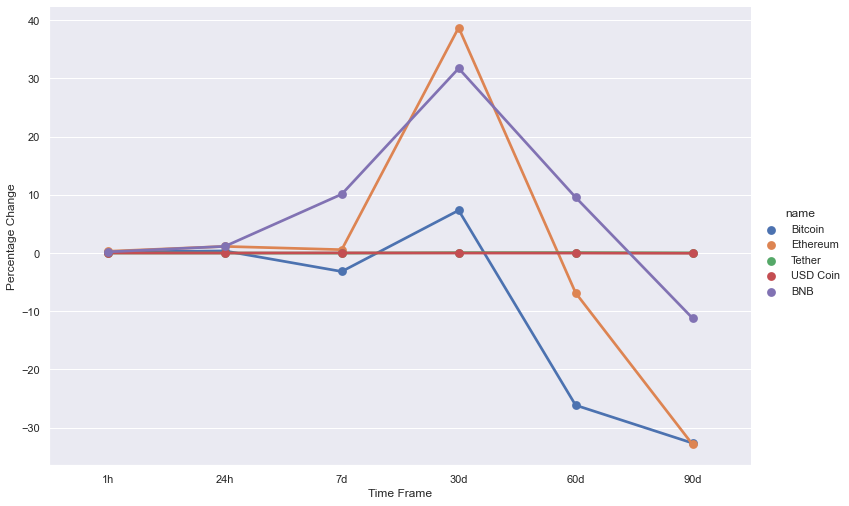

In [41]:
sns.catplot(x='Time Frame', y='Percentage Change', hue='name', data=stacked_df, kind='point', height=7, aspect=1.5)
plt.show()

### B) Which top 100 coins have been performing the best in the past 90 days?

In [112]:
best_pc_change = df_changes.iloc[:100, :].sort_values('quote.USD.percent_change_90d', ascending=False).head(10)
best_pc_change.set_index('name', inplace=True)
best_pc_change = best_pc_change.iloc[:, 4:]
best_pc_change

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Quant,14.69925,17.38220,94.56937,87.39099,46.59677
Ethereum Classic,2.51799,-4.09940,140.82646,73.80018,40.41029
Trust Wallet Token,-1.89198,22.98609,43.78113,89.31625,36.69737
Uniswap,-1.60810,1.77412,56.37438,67.25690,22.36135
OKB,1.09199,0.70117,42.79088,60.23797,14.24951
Bitcoin Gold,0.37718,-14.87910,76.78402,32.18767,11.33370
Fei USD,0.21022,0.69644,-0.16871,0.03740,0.76989
Neutrino USD,-0.56394,-0.35336,-0.26473,-0.85866,0.44957
Binance USD,-0.01460,-0.06851,0.04067,-0.16247,0.08372


In [86]:
best_pc_change = best_pc_change.stack().to_frame(name='values')
best_pc_change = best_pc_change.reset_index()
best_pc_change = best_pc_change.rename(columns={'level_1':'Time Frame', 'values':'Percentage Change'})
best_pc_change['Time Frame'] = best_pc_change['Time Frame'].str.replace('quote.USD.percent_change_', '', regex=False)
best_pc_change

,name,Time Frame,Percentage Change
0,Quant,24h,14.69925
1,Quant,7d,17.38220
2,Quant,30d,94.56937
3,Quant,60d,87.39099
4,Quant,90d,46.59677
5,Ethereum Classic,24h,2.51799
6,Ethereum Classic,7d,-4.09940
7,Ethereum Classic,30d,140.82646
8,Ethereum Classic,60d,73.80018
9,Ethereum Classic,90d,40.41029


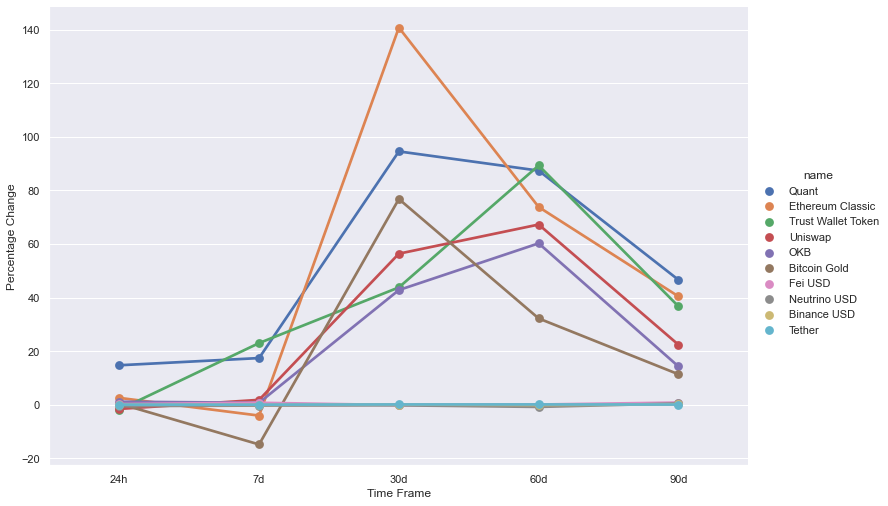

In [87]:
sns.catplot(x='Time Frame', y='Percentage Change', hue='name', data=best_pc_change, kind='point', height=7, aspect=1.5)
plt.show()

### C) Best performing and worst performing coins in the 50mil to 1bil market cap range

In [120]:
potentials = df_changes[(df_changes['quote.USD.market_cap'] >= 500000000) & (df_changes['quote.USD.market_cap'] <=1000000000)]
potentials

,name,quote.USD.market_cap,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
52,IOTA,956133336.92007,11180973.69301,-27.61190,0.30334,2.48265,6.14766,20.27021,-3.24586,-27.51353
53,Pax Dollar,945681005.44819,3353460.92063,-22.34120,0.00604,-0.05330,-0.01400,0.05185,-0.02331,-0.41133
54,Fantom,945598198.56553,264691394.55859,-29.03550,0.63793,-1.12520,8.76262,35.27589,4.37597,-46.82993
55,BitTorrent-New,917816076.10555,25157064.43489,-23.91970,0.09050,0.56395,2.48719,6.00528,-10.63757,-39.07965
56,THORChain,896679026.81366,72651297.54539,-38.40540,0.28466,-0.21266,-0.02200,13.94962,-9.55260,-54.08061
57,The Graph,894705484.54083,51886867.47196,-39.48750,0.44822,1.28039,-3.91697,27.02985,-16.89653,-57.67911
58,Chiliz,887835404.82179,112360332.73207,-26.43550,0.41684,2.59823,14.95596,45.03553,18.35934,-10.35415
59,Klaytn,878612061.48586,34220723.35031,-25.41970,-0.21271,0.34463,-6.35142,22.48390,-25.30126,-52.11379
60,eCash,867501367.78223,12069728.40357,13.47200,0.07461,0.77702,0.83882,4.75002,-20.58093,-34.89771
61,Lido DAO,827580410.91969,98029870.95872,-33.61720,1.65479,3.59925,11.35738,285.76145,147.67849,-7.80637


- potentials_1 = top 10 best performing
- potentials_2 = top 10 worst performing

In [121]:
potentials_1 = potentials.sort_values('quote.USD.percent_change_90d', ascending=False).head(10)
potentials_1.set_index('name', inplace=True)
potentials_1 = potentials_1.iloc[:, 4:]
potentials_1

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin Gold,0.37718,-14.87910,76.78402,32.18767,11.33370
Neutrino USD,-0.56394,-0.35336,-0.26473,-0.85866,0.44957
USDD,0.01221,0.12552,0.80003,-0.00583,-0.21318
Pax Dollar,-0.05330,-0.01400,0.05185,-0.02331,-0.41133
PAX Gold,0.05162,0.29838,1.62865,-4.58759,-6.15137
Lido DAO,3.59925,11.35738,285.76145,147.67849,-7.80637
Chiliz,2.59823,14.95596,45.03553,18.35934,-10.35415
Decred,-30.49753,44.72576,72.50122,10.23910,-18.82288
Basic Attention Token,2.84000,5.85788,-2.81753,10.35374,-21.34461


In [122]:
potentials_2 = potentials.sort_values('quote.USD.percent_change_90d', ascending=True).head(10)
potentials_2.set_index('name', inplace=True)
potentials_2 = potentials_2.iloc[:, 4:]
potentials_2

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Terra Classic,0.22485,1.86964,-11.22926,42.19161,-99.99985
STEPN,0.72279,-6.47105,-8.30545,-4.48510,-64.73528
The Graph,1.28039,-3.91697,27.02985,-16.89653,-57.67911
THORChain,-0.21266,-0.02200,13.94962,-9.55260,-54.08061
Waves,0.14356,7.38462,9.41655,-23.13023,-53.22102
Klaytn,0.34463,-6.35142,22.48390,-25.30126,-52.11379
Huobi Token,-1.04690,-3.22043,-6.92665,-40.40975,-50.12891
Mina,3.26037,5.30215,21.82147,-2.12405,-48.66225
Fantom,-1.12520,8.76262,35.27589,4.37597,-46.82993


In [123]:
potentials_1 = potentials_1.stack().to_frame(name='values')
potentials_1 = potentials_1.reset_index()
potentials_1 = potentials_1.rename(columns={'level_1':'Time Frame', 'values':'Percentage Change'})
potentials_1['Time Frame'] = potentials_1['Time Frame'].str.replace('quote.USD.percent_change_', '', regex=False)
potentials_1

,name,Time Frame,Percentage Change
0,Bitcoin Gold,24h,0.37718
1,Bitcoin Gold,7d,-14.87910
2,Bitcoin Gold,30d,76.78402
3,Bitcoin Gold,60d,32.18767
4,Bitcoin Gold,90d,11.33370
5,Neutrino USD,24h,-0.56394
6,Neutrino USD,7d,-0.35336
7,Neutrino USD,30d,-0.26473
8,Neutrino USD,60d,-0.85866
9,Neutrino USD,90d,0.44957


In [124]:
potentials_2 = potentials_2.stack().to_frame(name='values')
potentials_2 = potentials_2.reset_index()
potentials_2 = potentials_2.rename(columns={'level_1':'Time Frame', 'values':'Percentage Change'})
potentials_2['Time Frame'] = potentials_2['Time Frame'].str.replace('quote.USD.percent_change_', '', regex=False)
potentials_2

,name,Time Frame,Percentage Change
0,Terra Classic,24h,0.22485
1,Terra Classic,7d,1.86964
2,Terra Classic,30d,-11.22926
3,Terra Classic,60d,42.19161
4,Terra Classic,90d,-99.99985
5,STEPN,24h,0.72279
6,STEPN,7d,-6.47105
7,STEPN,30d,-8.30545
8,STEPN,60d,-4.48510
9,STEPN,90d,-64.73528


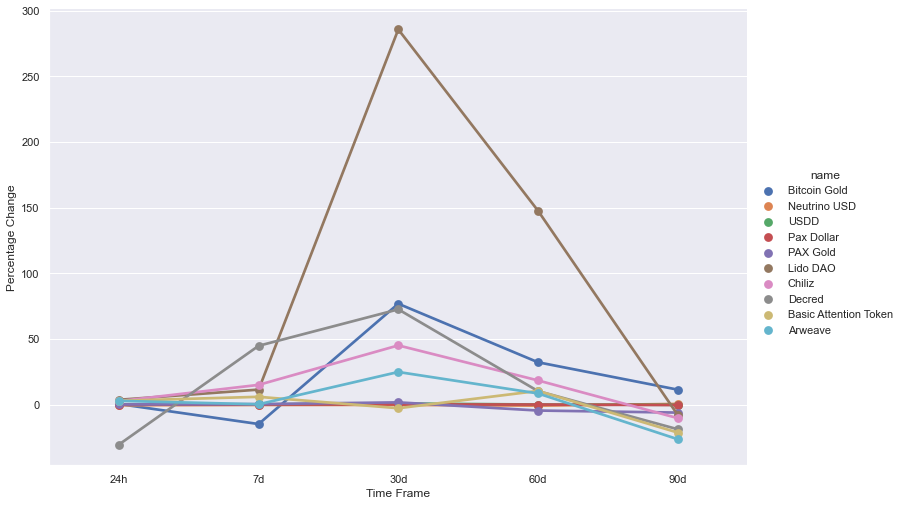

In [125]:
sns.catplot(x='Time Frame', y='Percentage Change', hue='name', data=potentials_1, kind='point', height=7, aspect=1.5)
plt.show()

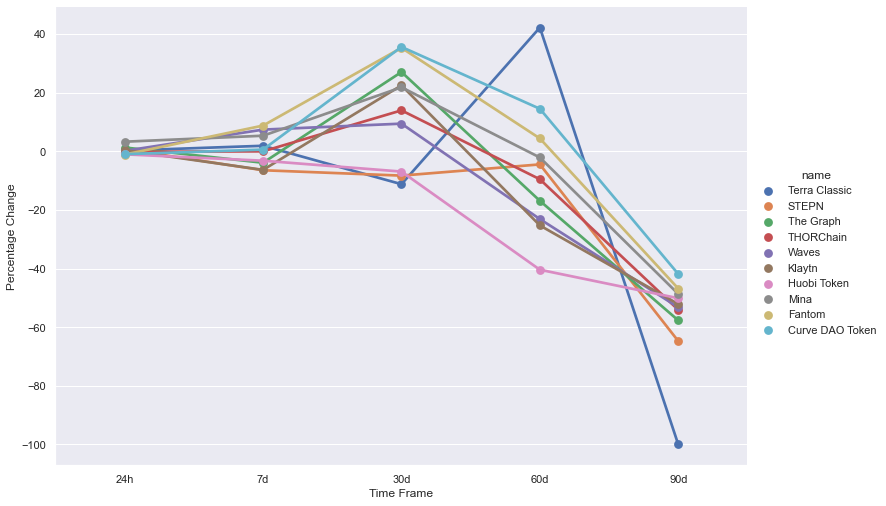

In [126]:
sns.catplot(x='Time Frame', y='Percentage Change', hue='name', data=potentials_2, kind='point', height=7, aspect=1.5)
plt.show()

**END**